# Youtube

#### Context

Socialblade is a well known company which maintains statistics of YouTube channels, Instagram accounts and many more. Their website features a page which shows Top 5000 YouTube channels and some basic information about them.

I wanted to use those values for performing EDA, so I decided to scrap it. The data contains Socialblade Rankings of top 5000 YouTube channels. The data can be used for finding useful insights and the revealing possible correlations between the features of the channels and their respective rankings.

Note: This work is not sponsored by Socialblade and is just one of an outcome of a fun project made using Data Science technologies. The project does not aim at violation of any policies or privacy since the data on the website is publicly available.

#### Content

The dataset contains the top 5000 rankings of the YouTube channels by a company named Socialblade. The data contains various information on the YouTube channels such as: the Socialblade channel rankings, the grades granted by Socialblade, the YouTube channel name, the number of videos uploaded by the channel, total number of subscribers on the channel and the total number of views on all the video content by the channel.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

youtube=pd.read_csv('youtube.csv')

# EDA

In [2]:
youtube.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


In [3]:
youtube.describe()

,Video views
count,5.000000e+03
mean,1.071449e+09
std,2.003844e+09
min,7.500000e+01
25%,1.862329e+08
50%,4.820548e+08
75%,1.124368e+09
max,4.754884e+10


In [4]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
Rank             5000 non-null object
Grade            5000 non-null object
Channel name     5000 non-null object
Video Uploads    5000 non-null object
Subscribers      5000 non-null object
Video views      5000 non-null int64
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [5]:
youtube['Video Uploads']=pd.to_numeric(youtube['Video Uploads'],errors='coerce')
youtube['Subscribers']=pd.to_numeric(youtube['Subscribers'],errors='coerce')
youtube['Rank']=youtube.index +1

In [6]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
Rank             5000 non-null int64
Grade            5000 non-null object
Channel name     5000 non-null object
Video Uploads    4994 non-null float64
Subscribers      4613 non-null float64
Video views      5000 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 234.5+ KB


In [7]:
youtube.drop('Channel name',axis=1,inplace=True)

In [8]:
youtube.head()

,Rank,Grade,Video Uploads,Subscribers,Video views
0,1,A++,82757.0,18752951.0,20869786591
1,2,A++,12661.0,61196302.0,47548839843
2,3,A++,373.0,19238251.0,9793305082
3,4,A++,27323.0,31180559.0,22675948293
4,5,A++,36756.0,32852346.0,26273668433


In [9]:
youtube.isnull().any()

Rank             False
Grade            False
Video Uploads     True
Subscribers       True
Video views      False
dtype: bool

In [10]:
youtube.isnull().sum()

Rank               0
Grade              0
Video Uploads      6
Subscribers      387
Video views        0
dtype: int64

We have NaN values in colummns Video Uploads and Subcribers. But we have only 6 NaN values for Video Uploads. Thus, let us fill the NaN subscribers values with the median value within the Grade feature and we will drop after the Nan values in Video Uploads. 

In [11]:
youtube["Subscribers"].fillna(youtube.groupby("Grade")["Subscribers"].transform("median"), inplace=True)


In [12]:
youtube.isnull().any()

Rank             False
Grade            False
Video Uploads     True
Subscribers      False
Video views      False
dtype: bool

In [13]:
youtube.isnull().sum()

Rank             0
Grade            0
Video Uploads    6
Subscribers      0
Video views      0
dtype: int64

In [14]:
youtube=youtube.dropna()

In [15]:
youtube.isnull().any()

Rank             False
Grade            False
Video Uploads    False
Subscribers      False
Video views      False
dtype: bool

In [16]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4994 entries, 0 to 4999
Data columns (total 5 columns):
Rank             4994 non-null int64
Grade            4994 non-null object
Video Uploads    4994 non-null float64
Subscribers      4994 non-null float64
Video views      4994 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 234.1+ KB


In [17]:
youtube.groupby(['Grade']).head()

,Rank,Grade,Video Uploads,Subscribers,Video views
0,1,A++,82757.0,18752951.0,20869786591
1,2,A++,12661.0,61196302.0,47548839843
2,3,A++,373.0,19238251.0,9793305082
3,4,A++,27323.0,31180559.0,22675948293
4,5,A++,36756.0,32852346.0,26273668433
10,11,A+,2085.0,33492951.0,8587520379
11,12,A+,822.0,39409726.0,19291034467
12,13,A+,150.0,7662886.0,2540099931
13,14,A+,50.0,18824912.0,8727783225
14,15,A+,16119.0,15899764.0,10989179147


In [18]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
encode.fit(['A++ ','A+ ','A ','A- ','B+ '])
youtube['Grade'] = encode.transform(youtube['Grade'])


In [19]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4994 entries, 0 to 4999
Data columns (total 5 columns):
Rank             4994 non-null int64
Grade            4994 non-null int64
Video Uploads    4994 non-null float64
Subscribers      4994 non-null float64
Video views      4994 non-null int64
dtypes: float64(2), int64(3)
memory usage: 234.1 KB


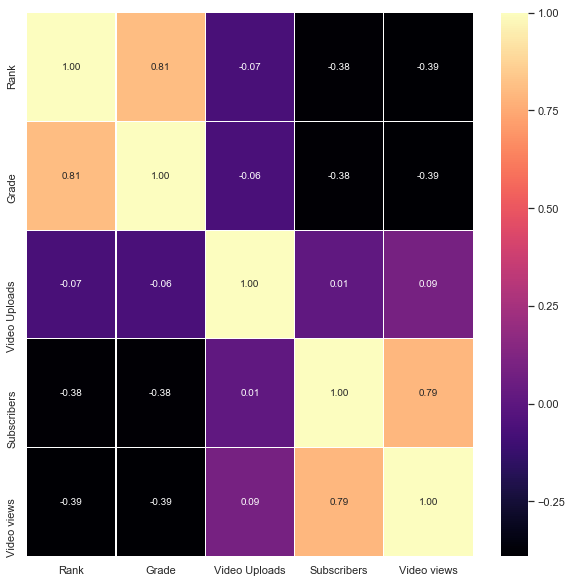

In [20]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(youtube.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

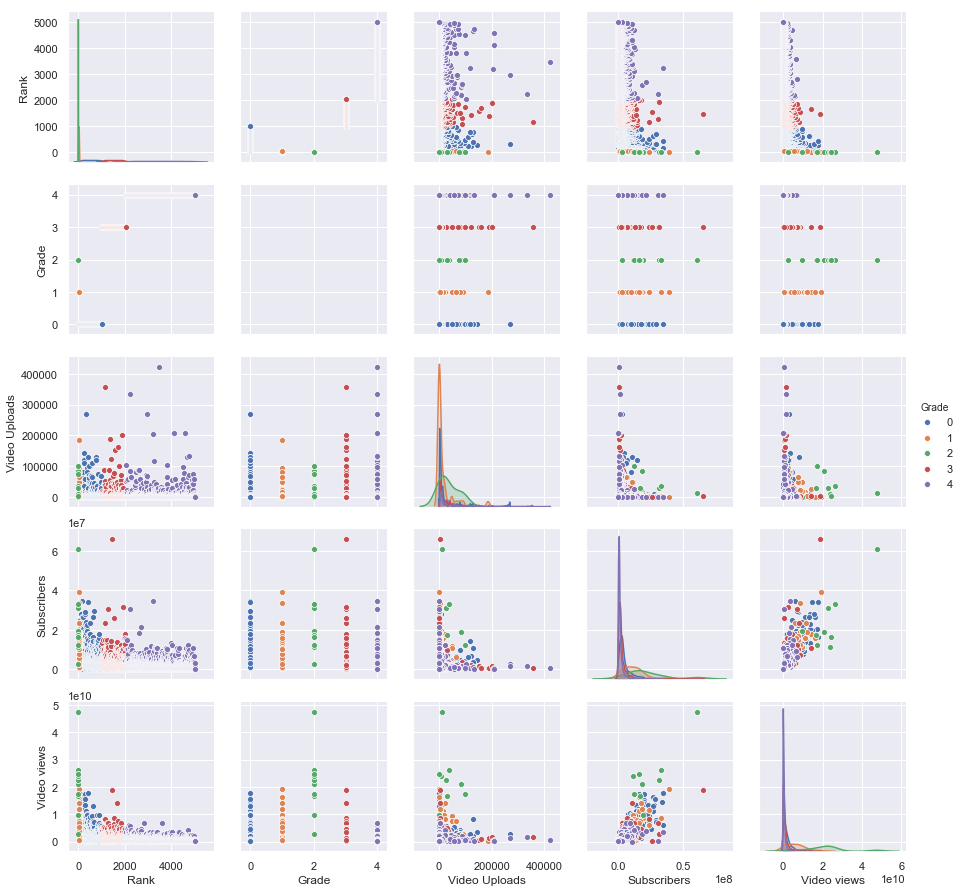

In [22]:
sns.pairplot(youtube,hue='Grade')

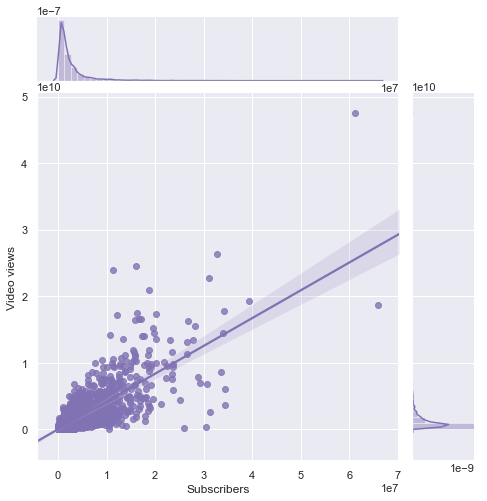

In [22]:
 sns.jointplot("Subscribers", "Video views", data=youtube, kind="reg", color="m", height=7)

# Regression

In [23]:
y = youtube["Video views"].values
x = youtube.drop(["Video views"],axis=1)

# separating train (80%) and test (%20) sets
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)


In [24]:
from sklearn.metrics import mean_squared_error,r2_score

target = "compressive_strength"
def model(algorithm,dtrainx,dtrainy,dtestx,dtesty,of_type):
    
    print (algorithm)
    print ("***************************************************************************")
    algorithm.fit(dtrainx,dtrainy)
    prediction = algorithm.predict(dtestx)
    print ("ROOT MEAN SQUARED ERROR :", "{:.2e}".format(np.sqrt(mean_squared_error(dtesty,prediction)) ))
    print ("R² :", r2_score(dtesty,prediction))
    print ("***************************************************************************")
    prediction = pd.DataFrame(prediction)
        
    plt.figure(figsize=(13,28))
    plt.subplot(211)
    
    df=pd.DataFrame(data=dtesty,columns=['Video views'])
    testy = df.reset_index()["Video views"]
    
    ax = testy.plot(label="originals",figsize=(12,13),linewidth=2)
    ax = prediction[0].plot(label = "predictions",figsize=(12,13),linewidth=2)
  #  plt.axhline(testy.mean(),color = "r",linestyle="dashed",label=("original_mean:",testy.mean()))
  #  plt.axhline(prediction[0].mean(),color="b",linestyle = "dashed",label=("prediction_mean:",prediction[0].mean()))
    plt.legend(loc="best")
    plt.title("ORIGINALS VS PREDICTIONS")
    plt.xlabel("index")
    plt.ylabel("values")
   # ax.set_facecolor("k")
    
    plt.subplot(212)
    
    if of_type == "coef":
        coef = pd.DataFrame(algorithm.coef_.ravel())
        coef["feat"] = dtrainx.columns
        ax1 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
                          linewidth=2,edgecolor="k"*coef["feat"].nunique())
        #ax1.set_facecolor("lightgrey")
        ax1.axhline(0,color="k",linewidth=2)
        plt.ylabel("coefficients")
        plt.xlabel("features")
        plt.xticks(rotation='vertical')
        plt.title('FEATURE IMPORTANCES')
    
    elif of_type == "feat":
        coef = pd.DataFrame(algorithm.feature_importances_)
        coef["feat"] = dtrainx.columns
        ax2 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
                          linewidth=2,edgecolor="k"*coef["feat"].nunique())
        #ax2.set_facecolor("lightgrey")
        ax2.axhline(0,color="k",linewidth=2)
        plt.ylabel("coefficients")
        plt.xlabel("features")
        plt.xticks(rotation='vertical')
        plt.title('FEATURE IMPORTANCES')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 1.07e+09
R² : 0.6150867254189343
***************************************************************************


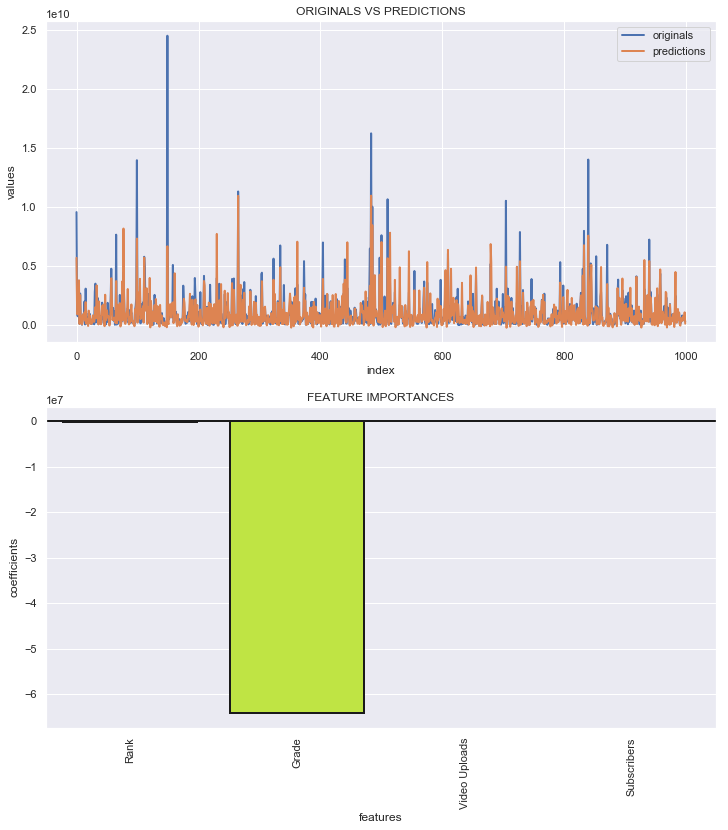

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model(lr,x_train,y_train,x_test,y_test,"coef")

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 1.07e+09
R² : 0.6150867254297019
***************************************************************************


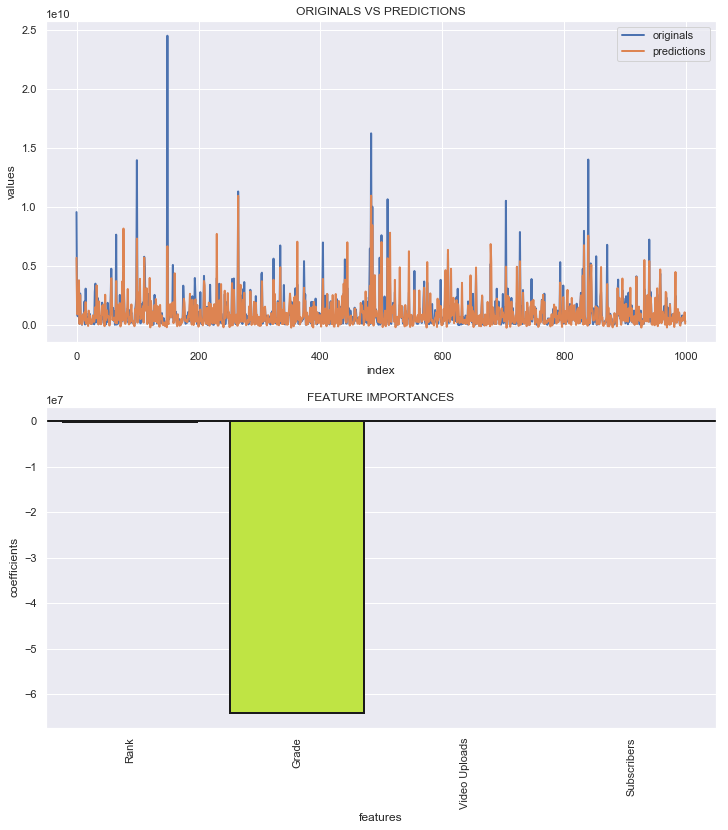

In [106]:
from sklearn.linear_model import Ridge,Lasso
ls = Lasso()
model(ls,x_train,y_train,x_test,y_test,"coef")


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
***************************************************************************
ROOT MEAN SQUARED ERROR : 1.07e+09
R² : 0.6150869036972861
***************************************************************************


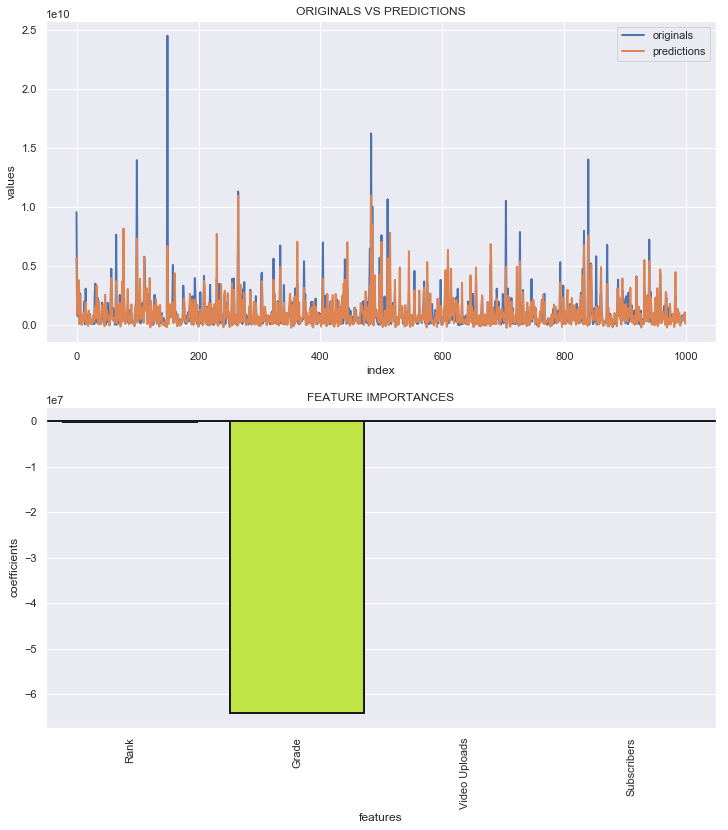

In [107]:
rigde = Ridge()
model(rigde,x_train,y_train,x_test,y_test,"coef")

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')
************************************************************************
ROOT MEAN SQUARED ERROR :  1.27e+09
 R²:  0.46295611318799035
***************************************************************************


Text(0, 0.5, 'values')

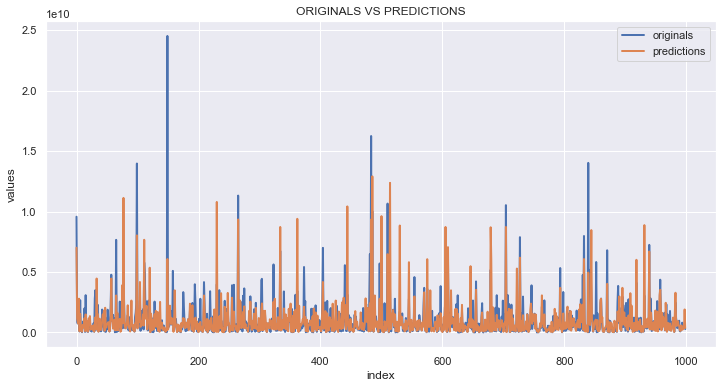

In [26]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

predictions = knn.predict(x_test)
predictions = pd.DataFrame(predictions)


df=pd.DataFrame(data=y_test,columns=['Video views'])
testy = df.reset_index()["Video views"]

print (knn)
print ("************************************************************************")
print ("ROOT MEAN SQUARED ERROR : ","{:.2e}".format(np.sqrt(mean_squared_error(y_test,predictions)) ))
print (" R²: ",r2_score(y_test,predictions))
print ("***************************************************************************")
ax3 = testy.plot(label="originals",figsize=(12,6),linewidth=2)
ax3 = predictions[0].plot(label="predictions",figsize=(12,6),linewidth=2)
plt.legend(loc="best")
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")
#ax3.set_facecolor("k")


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)
***************************************************************************
ROOT MEAN SQUARED ERROR : 1.11e+09
R² : 0.5861208928351025
***************************************************************************


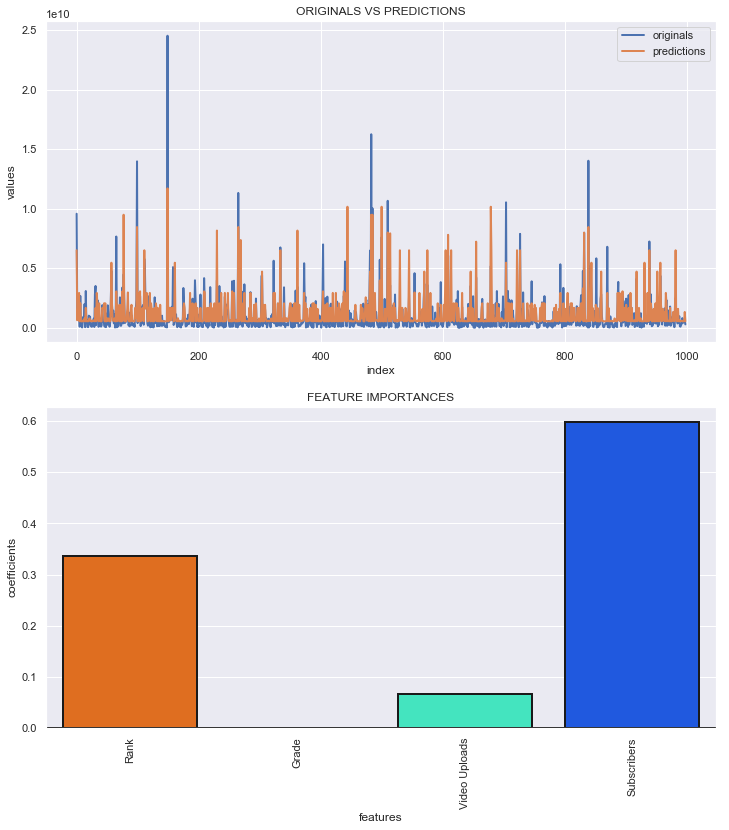

In [109]:
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor()
model(adb,x_train,y_train,x_test,y_test,"feat")

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 1.07e+09
R² : 0.6210323883648279
***************************************************************************


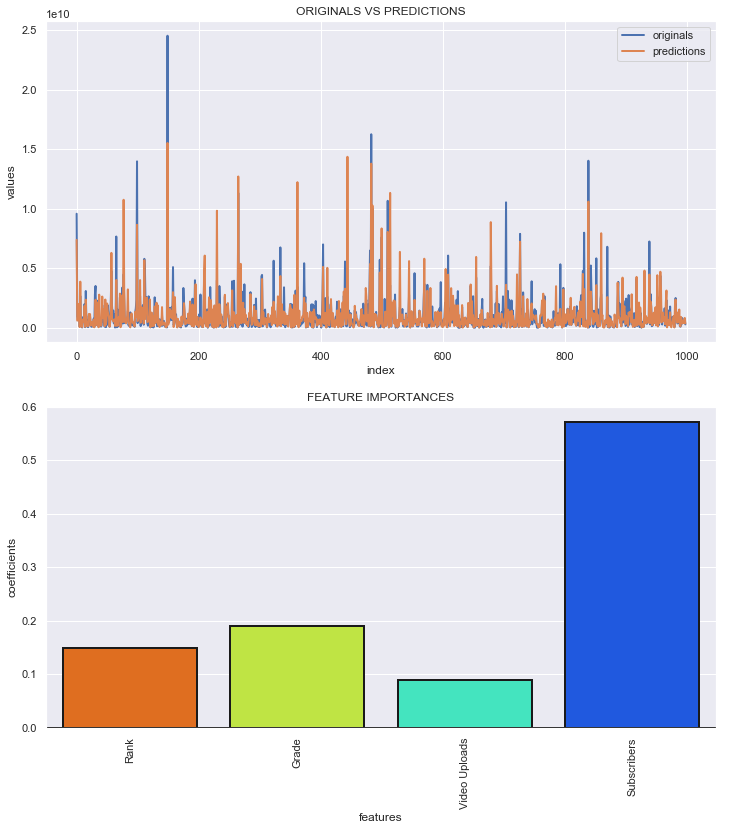

In [27]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
model(etr,x_train,y_train,x_test,y_test,"feat")

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
***************************************************************************
ROOT MEAN SQUARED ERROR : 1.32e+09
R² : 0.42010414385242045
***************************************************************************


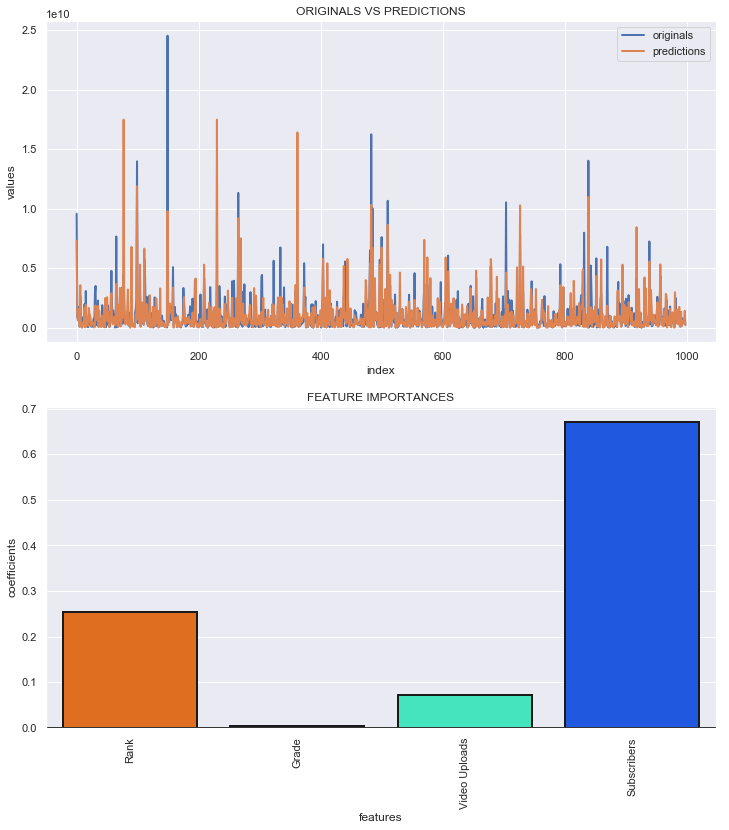

In [28]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
model(dtr,x_train,y_train,x_test,y_test,"feat")

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 1.03e+09
R² : 0.6441256595169009
***************************************************************************


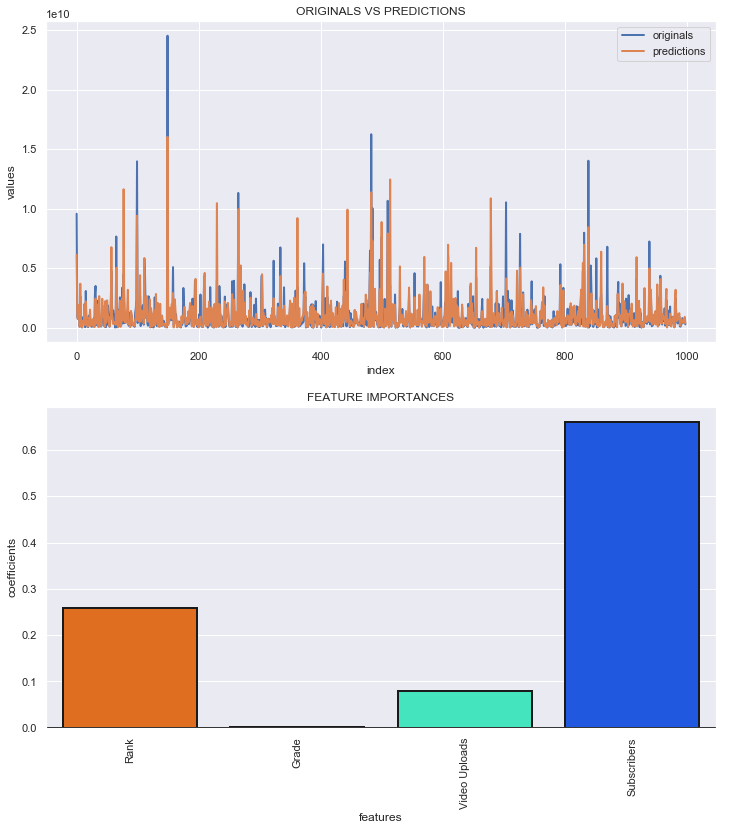

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model(rf,x_train,y_train,x_test,y_test,"feat")

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 9.68e+08
R² : 0.6872046954675249
***************************************************************************


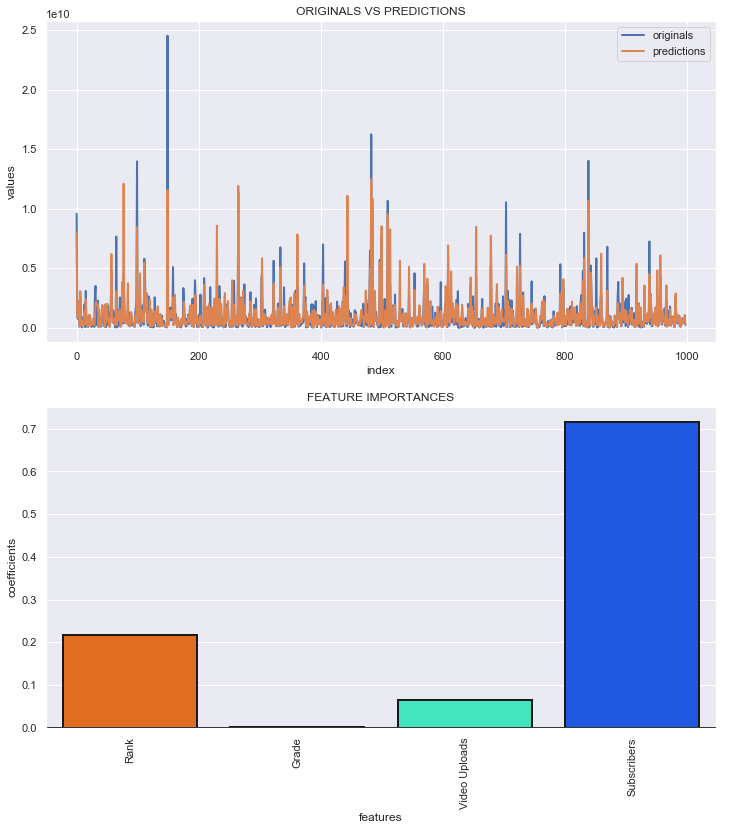

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
model(gbr,x_train,y_train,x_test,y_test,"feat")

Comments: The most important feature considering the best regressors is the Subscribers feature. Lets check this using PCA and KBest 

# PCA

In [31]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Text(0, 0.5, 'Variance Ratio')

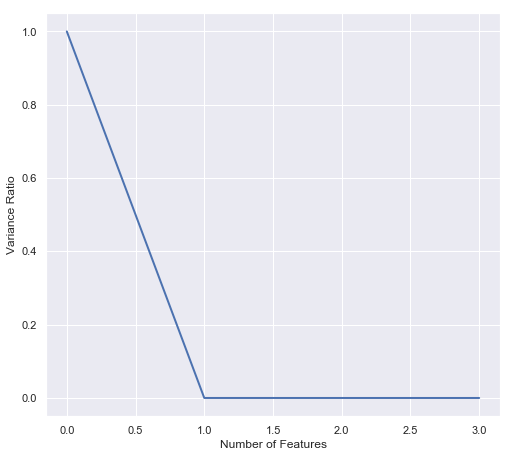

In [32]:
plt.figure(1, figsize=(9, 8))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Features')
plt.ylabel('Variance Ratio')


In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

UnivariateFeatureSelection = SelectKBest(chi2, k=1).fit(x_train, y_train)
diccionario = {key:value for (key, value) in zip(UnivariateFeatureSelection.scores_, x_train.columns)}
sorted(diccionario.items())

[(3106.0114875551485, 'Grade'),
 (3279539.8468938475, 'Rank'),
 (318023794.78568035, 'Video Uploads'),
 (24068248174.10609, 'Subscribers')]

The result in cells above confirms that Subscribers feature is the most important. The score from KBest selection shows that Subscribers is two orders of magnitude relevant in comparison with Video Uploads.

# Clustering

In [34]:
from sklearn.cluster import KMeans
X=youtube[['Subscribers','Video views']].values
sse=[]

# range(1,5) is random selection because in our dataset there may not be more than 30 cluster (assumption)
for i in range(1,8):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

In [38]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4994 entries, 0 to 4999
Data columns (total 5 columns):
Rank             4994 non-null int64
Grade            4994 non-null int64
Video Uploads    4994 non-null float64
Subscribers      4994 non-null float64
Video views      4994 non-null int64
dtypes: float64(2), int64(3)
memory usage: 234.1 KB


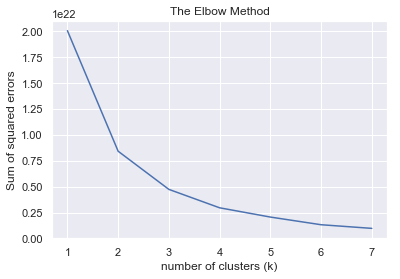

In [39]:
plt.plot(range(1,8), sse)
plt.title('The Elbow Method')
plt.xlabel('number of clusters (k)')
plt.ylabel('Sum of squared errors')
plt.show()

In [43]:
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

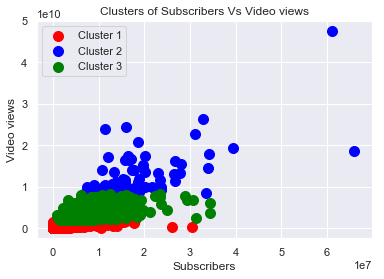

In [44]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of Subscribers Vs Video views')
plt.xlabel('Subscribers')
plt.ylabel('Video views')
plt.legend()
plt.show()


Clearly, the target cluster is the blue one which represents what we already predicted. Let us classify the blue one as 1 and the others as 0

# Classification

In [45]:
youtube["label_kmeans"] = y_kmeans
youtube.head()


,Rank,Grade,Video Uploads,Subscribers,Video views,label_kmeans
0,1,2,82757.0,18752951.0,20869786591,1
1,2,2,12661.0,61196302.0,47548839843,1
2,3,2,373.0,19238251.0,9793305082,1
3,4,2,27323.0,31180559.0,22675948293,1
4,5,2,36756.0,32852346.0,26273668433,1


In [46]:
youtube.tail()

,Rank,Grade,Video Uploads,Subscribers,Video views,label_kmeans
4995,4996,4,706.0,2072942.0,441202795,0
4996,4997,4,797.0,1055091.0,377331722,0
4997,4998,4,110.0,3265735.0,311758426,0
4998,4999,4,3475.0,32990.0,14563764,0
4999,5000,4,254.0,21172.0,73312511,0


In [48]:
label_kmeans_01=[1 if each==2 else 0 for each in youtube["label_kmeans"]]#converting cluster3=1 others=0.
label_kmeans_01_df=pd.DataFrame(data=label_kmeans_01,columns=["label_kmeans"])
youtube["label_kmeans"]=label_kmeans_01_df["label_kmeans"]

In [49]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4994 entries, 0 to 4999
Data columns (total 6 columns):
Rank             4994 non-null int64
Grade            4994 non-null int64
Video Uploads    4994 non-null float64
Subscribers      4994 non-null float64
Video views      4994 non-null int64
label_kmeans     4988 non-null float64
dtypes: float64(3), int64(3)
memory usage: 273.1 KB


In [52]:
youtube=youtube.dropna()

In [53]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

y = youtube["label_kmeans"].values
x = youtube.drop(["label_kmeans"],axis=1)

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)

scaler = MinMaxScaler()# escala as features entre 0 e 1.

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

LR: 0.891479 (0.013638)
LDA: 0.890226 (0.014476)
KNN: 0.899499 (0.013610)
CART: 0.861654 (0.022634)
NB: 0.835338 (0.018419)
SVM: 0.891479 (0.013638)


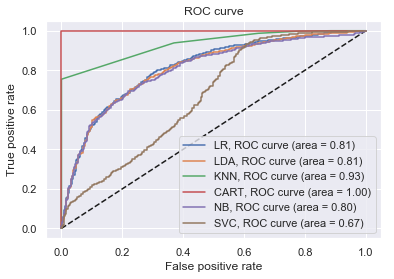

--------------------------
LogisticRegression Report
--------------------------
accuracy = 0.8957915831663327
confusion matrix [[894   1]
 [103   0]]
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       895
         1.0       0.00      0.00      0.00       103

   micro avg       0.90      0.90      0.90       998
   macro avg       0.45      0.50      0.47       998
weighted avg       0.80      0.90      0.85       998

--------------------------
LinearDiscriminantAnalysis Report
--------------------------
accuracy = 0.8787575150300602
confusion matrix [[844  51]
 [ 70  33]]
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       895
         1.0       0.39      0.32      0.35       103

   micro avg       0.88      0.88      0.88       998
   macro avg       0.66      0.63      0.64       998
weighted avg       0.87      0.88      0.87       998

--------------------------
KNeighborsC

In [55]:
seed = 7
scoring = 'accuracy'

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, y_train,cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


from sklearn import metrics

lr=LogisticRegression().fit(X_train,y_train)
prob_lr=lr.predict_proba(X_train)

lda=LinearDiscriminantAnalysis().fit(X_train,y_train)
prob_lda=lda.predict_proba(X_train)

knn=KNeighborsClassifier().fit(X_train,y_train)
prob_knn=knn.predict_proba(X_train)

cart=DecisionTreeClassifier().fit(X_train,y_train)
prob_cart=cart.predict_proba(X_train)

gnb=GaussianNB().fit(X_train,y_train)
prob_gnb=gnb.predict_proba(X_train)

svm=SVC(probability=True).fit(X_train,y_train)
prob_svm=svm.predict_proba(X_train)


#Compute the ROC curve: true positives/false positives

tpr_lr,fpr_lr,thresh_lr=metrics.roc_curve(y_train,prob_lr[:,0])
tpr_lda,fpr_lda,thresh_lda=metrics.roc_curve(y_train,prob_lda[:,0])
tpr_knn,fpr_knn,thresh_knn=metrics.roc_curve(y_train,prob_knn[:,0])
tpr_cart,fpr_cart,thresh_cart=metrics.roc_curve(y_train,prob_cart[:,0])
tpr_gnb,fpr_gnb,thresh_gnb=metrics.roc_curve(y_train,prob_gnb[:,0])
tpr_svm,fpr_svm,thresh_svm=metrics.roc_curve(y_train,prob_svm[:,0])

#Area under Curve (AUC)
from sklearn.metrics import auc

roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_lda = auc(fpr_lda, tpr_lda)
roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_cart = auc(fpr_cart, tpr_cart)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)
roc_auc_svm = auc(fpr_svm, tpr_svm)

#Plotting the ROC curves


plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR, ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_lda, tpr_lda, label='LDA, ROC curve (area = %0.2f)' % roc_auc_lda)
plt.plot(fpr_knn, tpr_knn, label='KNN, ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot(fpr_cart, tpr_cart, label='CART, ROC curve (area = %0.2f)' % roc_auc_cart)
plt.plot(fpr_gnb, tpr_gnb, label='NB, ROC curve (area = %0.2f)' % roc_auc_gnb)
plt.plot(fpr_svm, tpr_svm, label='SVC, ROC curve (area = %0.2f)' % roc_auc_svm)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# Make predictions on validation dataset
print("--------------------------")
print("LogisticRegression Report")
print("--------------------------")
predictions_lr = lr.predict(X_test)
print("accuracy =",accuracy_score(y_test, predictions_lr))
print("confusion matrix",confusion_matrix(y_test, predictions_lr))
print(classification_report(y_test, predictions_lr))

print("--------------------------")
print("LinearDiscriminantAnalysis Report")
print("--------------------------")
predictions_lda = lda.predict(X_test)
print("accuracy =",accuracy_score(y_test, predictions_lda))
print("confusion matrix",confusion_matrix(y_test, predictions_lda))
print(classification_report(y_test, predictions_lda))

print("--------------------------")
print("KNeighborsClassifier Report")
print("--------------------------")
predictions_knn = knn.predict(X_test)
print("accuracy =",accuracy_score(y_test, predictions_knn))
print("confusion matrix",confusion_matrix(y_test, predictions_knn))
print(classification_report(y_test, predictions_knn))

print("--------------------------")
print("DecisionTreeClassifier Report")
print("--------------------------")
predictions = cart.predict(X_test)
print("accuracy =",accuracy_score(y_test, predictions))
print("confusion matrix",confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

print("--------------------------")
print("GaussianNB Report")
print("--------------------------")
predictions_gnb = gnb.predict(X_test)
print("accuracy =",accuracy_score(y_test, predictions_gnb))
print("confusion matrix",confusion_matrix(y_test, predictions_gnb))
print(classification_report(y_test, predictions_gnb))

print("--------------------------")
print("SVC Report")
print("--------------------------")
predictions_svm = svm.predict(X_test)
print("accuracy =",accuracy_score(y_test, predictions_svm))
print("confusion matrix",confusion_matrix(y_test, predictions_svm))
print(classification_report(y_test, predictions_svm))

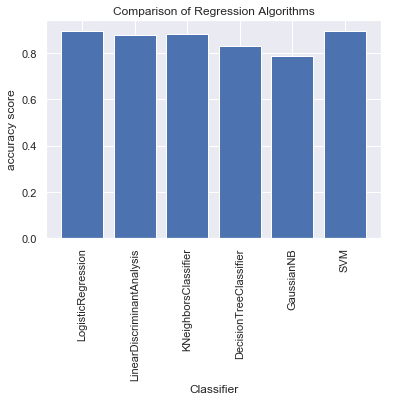

In [56]:
import numpy as np
y = np.array([accuracy_score(y_test, predictions_lr),accuracy_score(y_test, predictions_lda),accuracy_score(y_test, predictions_knn),accuracy_score(y_test, predictions),accuracy_score(y_test, predictions_gnb),accuracy_score(y_test, predictions_svm)])
x = ['LogisticRegression','LinearDiscriminantAnalysis','KNeighborsClassifier','DecisionTreeClassifier','GaussianNB','SVM']
plt.bar(x,y)
plt.title("Comparison of Regression Algorithms")
plt.xticks(rotation=90)
plt.xlabel("Classifier")
plt.ylabel("accuracy score")
plt.show()